In [217]:


#for i in rset:
        
      #  Pset2z = N*np.array(Pset2)
       # print ("P(r,λ) for r value of", i, "is",Pset2z[i])
#plt.plot(rset,Pset2z)
#plt.title("Distribution of Probability for Each R Count")
#plt.xlabel("r ")
#plt.ylabel("P(r,λ)")

In [257]:
import statistics 
import numpy
import math
import numpy as np
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad 
from scipy.stats import chisquare
from decimal import Decimal

DataSet1 = [0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
           5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,8]
DataSet2 = [21,24,26,26,26,26,26,27,28,28,28,28,28,29,29,30,30,30,31,31,31,31,31,32,32,32,32,33,33,33,
            34,34,34,34,35,35,35,35,35,36,36,36,36,37,37,38,39,39,40,41,41,41,41,42,42,42,44,44,45,46,47]

DataSet3 = [314, 323, 323, 323, 327, 332, 338, 348, 352, 352, 358, 365, 392]

DataSet4 = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
            3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6]

In [258]:
def SampleSize(Set):
    N = len(Set)
    return N
    

In [259]:
# function to calculate factorial
def Factorial(n):
    
    factorial = 1
    if int(n) >= 0:
        for i in range (1,int(n)+1):
                factorial = factorial * i
        return factorial

In [370]:
# function to plot histogram
def Histogram(Set,SampleSize,Stat):
    
    mean,STD,variance,Uncertainty=Stat
    N = SampleSize
    
    print("Total sample size of counts is:", N)
    print("Standard Deviation of the Data is:",STD)
    print("Variance of the Data is:",variance)
    print("Mean of the Data is:", mean)
    print("Uncertainty of the data is: +-",Uncertainty)
    num_bins = N
    N, bins, patches = plt.hist(Set, num_bins, facecolor='blue', alpha=0.5)
    plt.title("Rate of occurence of counterate")
    plt.xlabel("r")
    plt.ylabel("Frequency of Occurence")
    plt.subplots_adjust(left=0.15)
    plt.show()



In [371]:
def Stat(Set,SampleSize):
    N = SampleSize
    mean = (statistics.mean(Set))
    STD = (statistics.stdev(Set,xbar=None))
    variance = (statistics.variance(Set))
    Uncertainty = (STD/(math.sqrt(N)))
    return mean,STD,variance,Uncertainty

In [372]:
def Gaussian(Stat,Factorial,Set,SampleSize):
    Gset=[]
    mean,STD,variance,Uncertainty=Stat
    N=SampleSize
    
    for i in Set:
        
        G = (1/variance*math.sqrt(2*np.pi)*(np.exp((((-1/2)*((i-mean)**2)))/(variance**2))))
        
        #print ("G for r value of", i, "is", G)
        Gset.append(G)
    plt.plot(Set,Gset)
    plt.xlabel("r ")
    plt.ylabel("P(r,λ) Probability of r to occur")

In [373]:
# function to model the occurence of counts of particles hitting the detector
def Poisson(Stat,Factorial,Set,SampleSize):
    Pset=[]
    mean,STD,variance,Uncertainty=Stat
    N=SampleSize
    
    for i in Set:
        if(i>30):
            P = ((np.exp(i-mean))*((mean/i)**i))/ (math.sqrt(2*np.pi*i))
            #print ("P for r value of", i, "is", P)
            Pset.append(P)
        else:
            P = (((mean**i)*(math.exp(-mean)/(Factorial(i)))))
            #print ("P for r value of", i, "is", P)
            Pset.append(P)
    plt.plot(Set,Pset)
    plt.xlabel("r ")
    plt.ylabel("P(r,λ) Probability of r to occur")

Total sample size of counts is: 101
Standard Deviation of the Data is: 1.8323819913915977
Variance of the Data is: 3.3576237623762375
Mean of the Data is: 3.227722772277228
Uncertainty of the data is: +- 0.182328822810568


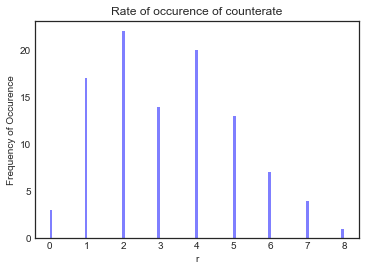

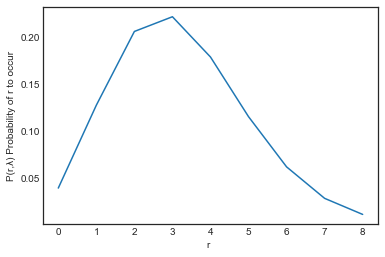

In [374]:
# V = 730, t = 0.1m, N=101
#Data Set 1 unshielded

SampleSize(DataSet1)
Stat(DataSet1,SampleSize(DataSet1))
Histogram(DataSet1,SampleSize(DataSet1),Stat(DataSet1,SampleSize(DataSet1)))
Poisson(Stat(DataSet1,SampleSize(DataSet1)),Factorial,DataSet1,SampleSize(DataSet1))


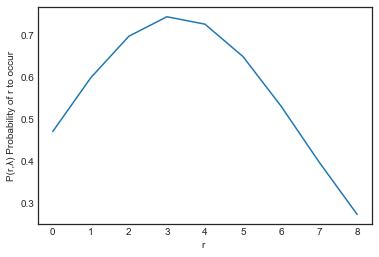

In [375]:
Gaussian(Stat(DataSet1,SampleSize(DataSet1)),Factorial,DataSet1,SampleSize(DataSet1))

Total sample size of counts is: 61
Standard Deviation of the Data is: 5.976319389274886
Variance of the Data is: 35.71639344262295
Mean of the Data is: 33.98360655737705
Uncertainty of the data is: +- 0.7651892880852268


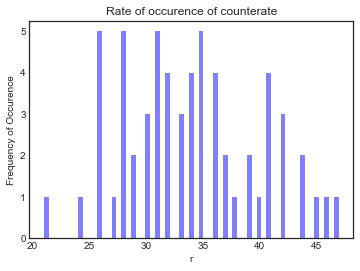

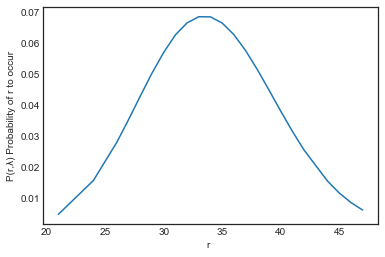

In [376]:
# Data Set 2 : t = 1m, N = 61, V = 730
SampleSize(DataSet2)
Stat(DataSet2,SampleSize(DataSet2))
Histogram(DataSet2,SampleSize(DataSet2),Stat(DataSet2,SampleSize(DataSet2)))
Poisson(Stat(DataSet2,SampleSize(DataSet2)),Factorial,DataSet2,SampleSize(DataSet2))

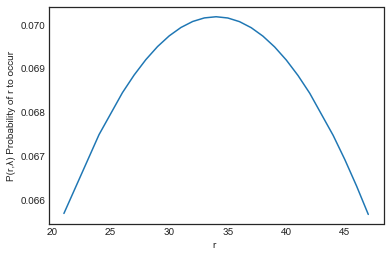

In [377]:
Gaussian(Stat(DataSet2,SampleSize(DataSet2)),Factorial,DataSet2,SampleSize(DataSet2))

Total sample size of counts is: 13
Standard Deviation of the Data is: 21.84971982452536
Variance of the Data is: 477.4102564102564
Mean of the Data is: 342.0769230769231
Uncertainty of the data is: +- 6.0600219370652475


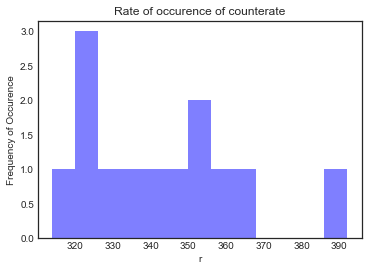

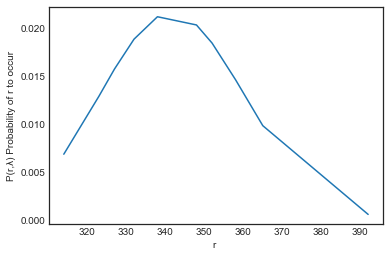

In [378]:
# Data Set 3 : t = 10.0m, N = 13, V = 730

SampleSize(DataSet3)
Stat(DataSet3,SampleSize(DataSet3))
Histogram(DataSet3,SampleSize(DataSet3),Stat(DataSet3,SampleSize(DataSet3)))
Poisson(Stat(DataSet3,SampleSize(DataSet3)),Factorial,DataSet3,SampleSize(DataSet3))

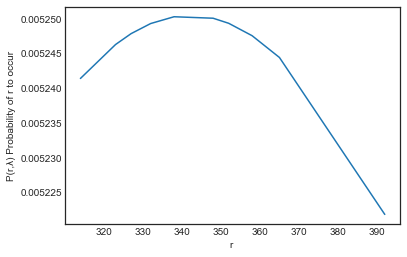

In [379]:
Gaussian(Stat(DataSet3,SampleSize(DataSet3)),Factorial,DataSet3,SampleSize(DataSet3))

Total sample size of counts is: 100
Standard Deviation of the Data is: 1.395338559980945
Variance of the Data is: 1.946969696969697
Mean of the Data is: 2.15
Uncertainty of the data is: +- 0.13953385599809448


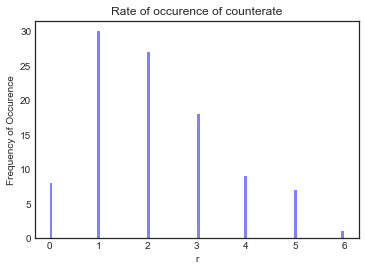

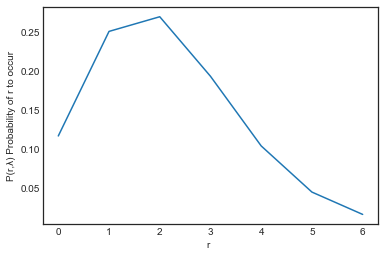

In [380]:
# Data Set 4 : t = 1.0m, N = 100, V = 730
SampleSize(DataSet4)
Stat(DataSet4,SampleSize(DataSet4))
Histogram(DataSet4,SampleSize(DataSet4),Stat(DataSet4,SampleSize(DataSet4)))
Poisson(Stat(DataSet4,SampleSize(DataSet4)),Factorial,DataSet4,SampleSize(DataSet4))

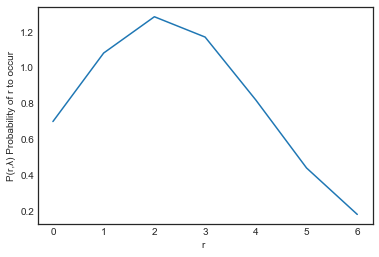

In [381]:
Gaussian(Stat(DataSet4,SampleSize(DataSet4)),Factorial,DataSet4,SampleSize(DataSet4))

In [328]:
print("Set 1 Statistic is",chisquare(DataSet1)[0])
print("Set 1 p-value is",chisquare(DataSet1)[1])
print('')
print("Set 2 Statistic is",chisquare(DataSet2)[0])
print("Set 2 p-value is",chisquare(DataSet2)[1])
print('')
print("Set 3 Statistic is",chisquare(DataSet3)[0])
print("Set 3 p-value is",chisquare(DataSet3)[1])
print('')
print("Set 4 Statistic is",chisquare(DataSet4)[0])
print("Set 4 p-value is",chisquare(DataSet4)[1])



Set 1 Statistic is 104.02453987730061
Set 1 p-value is 0.37151079935047165

Set 2 Statistic is 63.059334298118664
Set 2 p-value is 0.3686918993192531

Set 3 Statistic is 16.747470204632336
Set 3 p-value is 0.15934608675917805

Set 4 Statistic is 89.6511627906977
Set 4 p-value is 0.7385091002340485
